# Exemples for image3d toolbox

This exemple shows the minimum things to do to autocorrelate a 3D image

## Toolbox needed

In [1]:
import image3d.image3d as image3d
import image3d.xcorr3d as xcorr3d
import image3d.load_data as load_data

## Create a 3d black and white image (0 or 1) to build a 3d object

It can be read from tiff file using the function load_data.load_image_from_tiff


0 background and 1 ellipsoidale

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt

size=100 #number of voxel size³
center=size/2

ax=size*0.25
ay=size*0.10
az=size*0.25

im=np.zeros([size,size,size])

for i in np.linspace(center-int(ax),center+int(ax),2*int(ax)+1):
    for j in np.linspace(center-int(ay),center+int(ay),2*int(ay)+1):
        for k in np.linspace(center-int(az),center+int(az),2*int(az)+1):
            if ((i-center)**2/(ax**2)+(j-center)**2/(ay**2)+(k-center)**2/(az**2))<1:
                im[int(i),int(j),int(k)]=1


## Build the image3d object

In [3]:
res=1 # resolution of the image, size of the Voxel
data=image3d.image3d(im,res)

## Plot one slice of the image

Text(0.5,1,'Image, Y section, middle')

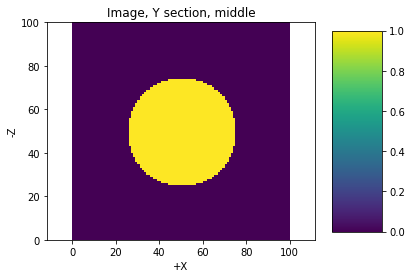

In [4]:
plt.figure()
data.plot('Y',0.5)
plt.title('Image, Y section, middle')

Text(0.5,1,'Image, Z section, middle')

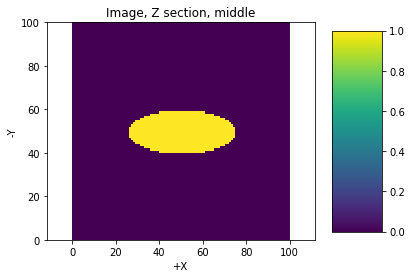

In [5]:
plt.figure()
data.plot('Z',0.5)
plt.title('Image, Z section, middle')

## Compute the autcorrelation function

In [6]:
print ('Begining autocorrelation', time.asctime())
autocorr=data.xcorr3d()
print ('End autocorrelation', time.asctime())

Begining autocorrelation Wed Nov  7 15:10:51 2018
End autocorrelation Wed Nov  7 15:10:51 2018


## Plot one slice of autocorrelation function

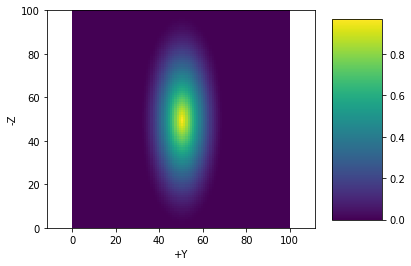

In [7]:
autocorr.plot('X',0.5)

## Extract Correlation radius for every direction
Plot it in a pole figure

Begining stereo proj Wed Nov  7 15:10:51 2018
End stereo proj Wed Nov  7 15:10:58 2018


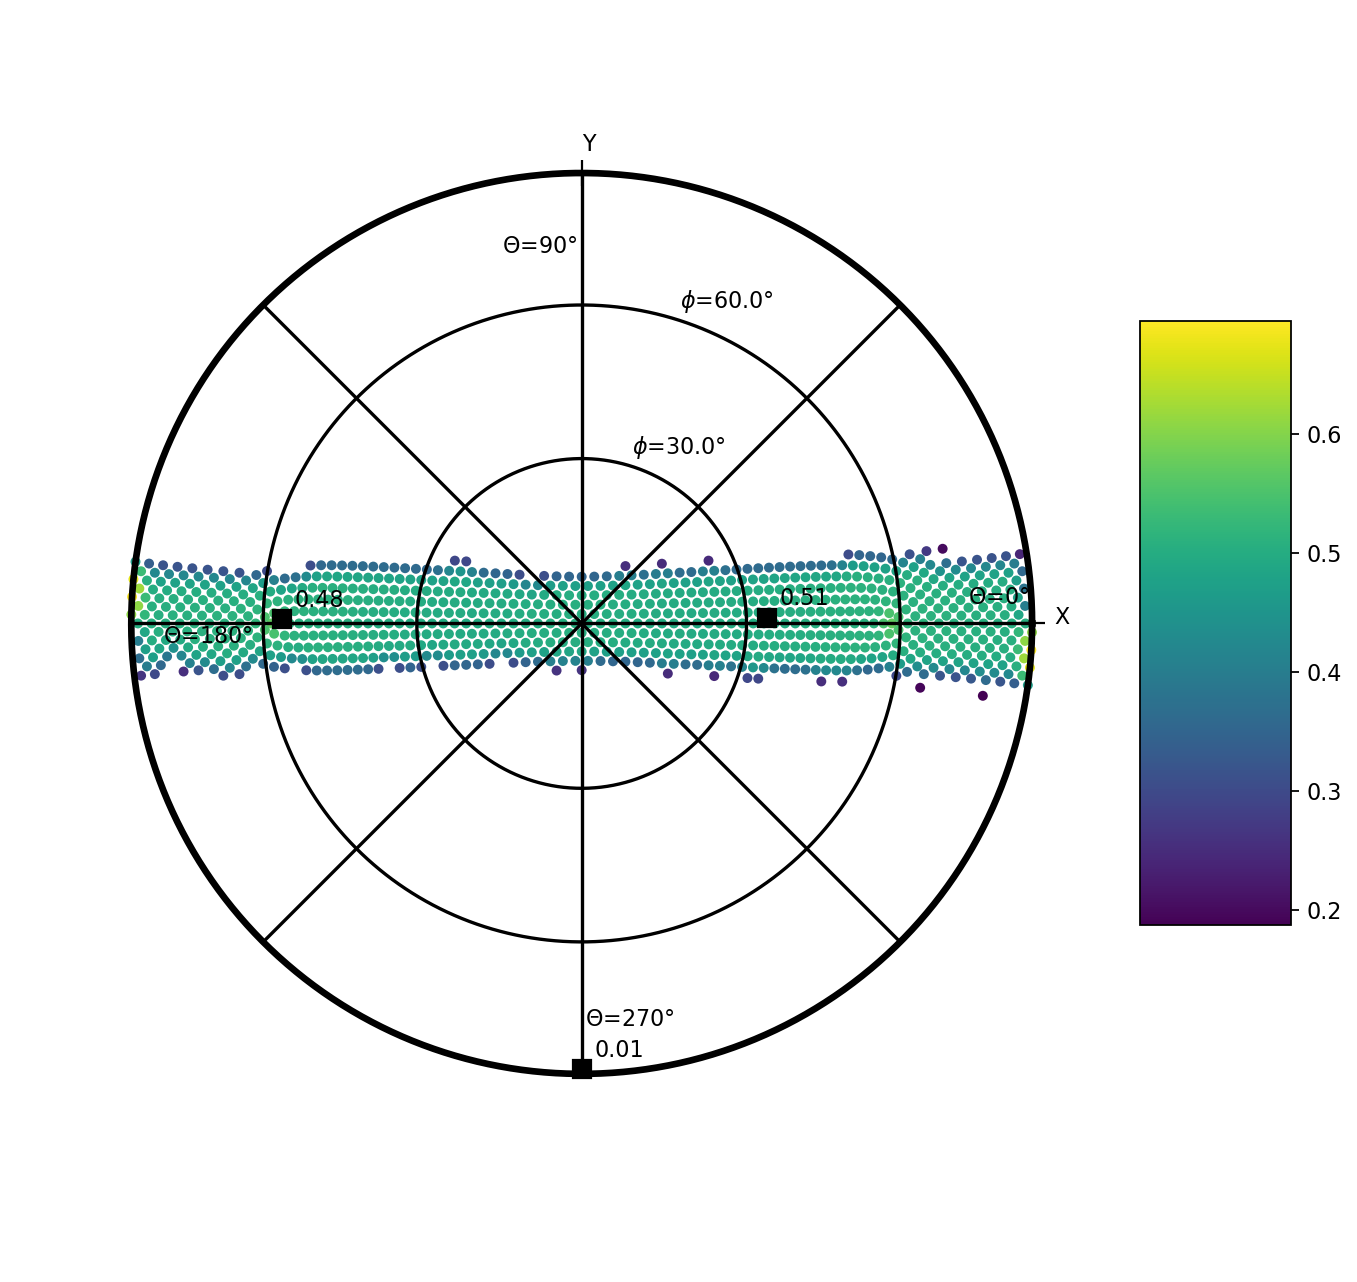

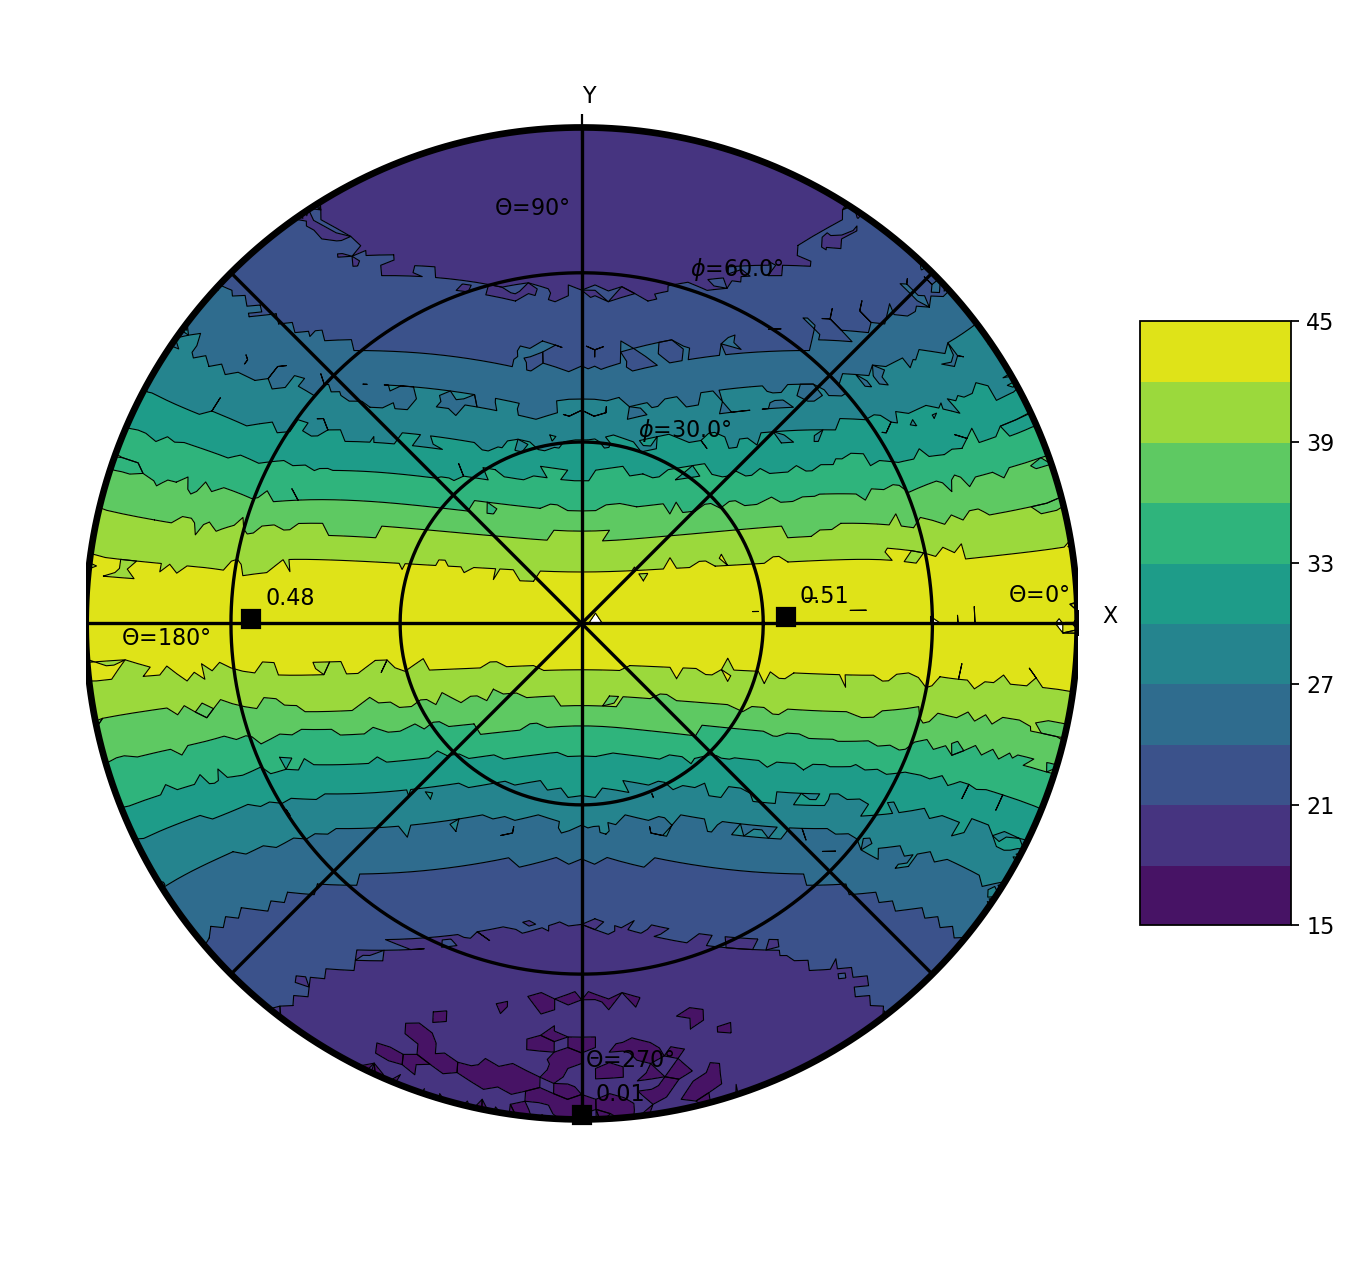

In [8]:
print ('Begining stereo proj', time.asctime())
[eigvalue,eigvector,radiusmean,radiusstd,xmin]=autocorr.stereographic_corr_length(coeffCinf=np.array([1.]),pc=15)
print ('End stereo proj', time.asctime())